**NLP**(Natural Language Processing)

NLP is a subfield of Artificial Intelligence and is concerned with interactions between computers and human languages.

Use cases of NLP are:



1.   Automatic summarization
2.   Named entity recognition
3.   Question answering systems





**SPACY**

spacy is a free, open-source library for NLP in Python.
It’s written in Cython.

**USING SPACY**

In [ ]:
import spacy
nlp=spacy.load('en')

**THE STEPS OF NLP ARE:**


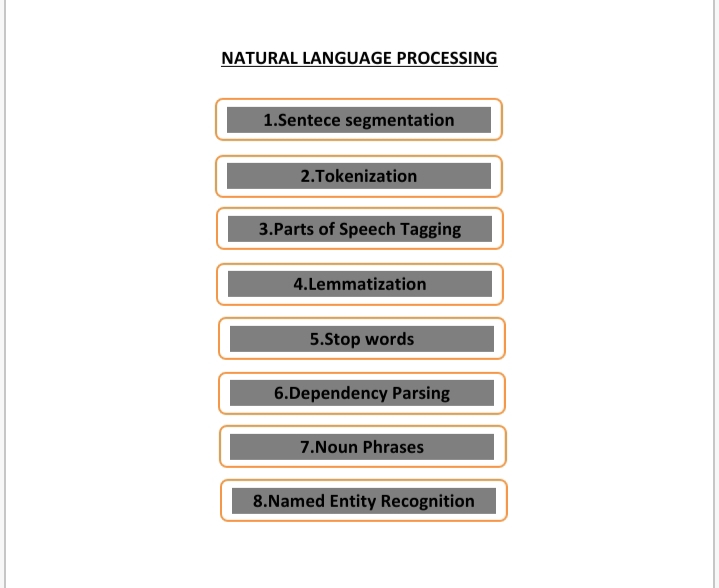



**1.SENTENCE DETECTION(SEGMENTATION):**




Sentence Detection is the process of locating the start and end of sentences in a given text.

In spaCy, the sents property is used to extract sentences.

In [ ]:
 about_text = ('Gus Proto is a Python developer currently'
                ' working for a London-based Fintech'
              ' company. He is interested in learning'
               ' Natural Language Processing.')
 about_doc = nlp(about_text)
 sentences = list(about_doc.sents)
 len(sentences)

2

In [ ]:
for sentence in sentences:
     print (sentence)

Gus Proto is a Python developer currently working for a London-based Fintech company.
He is interested in learning Natural Language Processing.


**2. TOKENIZATION:** 


Tokenization is the next step after sentence detection.It allows us to identify the basic units in given text.These basic units are called tokens. Tokenization is useful because it breaks a text into meaningful units.These units are used for further analysis , like part of speech tagging.

In [ ]:
[token.text for token in about_doc]

['Gus',
 'Proto',
 'is',
 'a',
 'Python',
 'developer',
 'currently',
 'working',
 'for',
 'a',
 'London',
 '-',
 'based',
 'Fintech',
 'company',
 '.',
 'He',
 'is',
 'interested',
 'in',
 'learning',
 'Natural',
 'Language',
 'Processing',
 '.']

### 3. Parts of Speech Tagging

Parts of speech or POS is a grammatical role that explains how a particular word is used in a sentence.

Parts of speech tagging is the process of assigning a POS tag to each token depending on its usage in the sentence. POS tags are useful for assigning a syntactic category like noun or verb to each word.

Here, two attributes of the Token class are accessed:

1.  tag_  lists the fine-grained part of speech.
2.  pos_  lists the coarse-grained part of speech.

spacy.explain gives descriptive details about a particular POS tag. spaCy provides a complete tag list along with an explanation for each tag.

In [ ]:
for token in about_doc:
  print (token,   token.pos_,  token.tag_,  spacy.explain(token.tag_))

Gus PROPN NNP noun, proper singular
Proto PROPN NNP noun, proper singular
is AUX VBZ verb, 3rd person singular present
a DET DT determiner
Python PROPN NNP noun, proper singular
developer NOUN NN noun, singular or mass
currently ADV RB adverb
working VERB VBG verb, gerund or present participle
for ADP IN conjunction, subordinating or preposition
a DET DT determiner
London PROPN NNP noun, proper singular
- PUNCT HYPH punctuation mark, hyphen
based VERB VBN verb, past participle
Fintech PROPN NNP noun, proper singular
company NOUN NN noun, singular or mass
. PUNCT . punctuation mark, sentence closer
He PRON PRP pronoun, personal
is AUX VBZ verb, 3rd person singular present
interested ADJ JJ adjective
in ADP IN conjunction, subordinating or preposition
learning VERB VBG verb, gerund or present participle
Natural PROPN NNP noun, proper singular
Language PROPN NNP noun, proper singular
Processing PROPN NNP noun, proper singular
. PUNCT . punctuation mark, sentence closer


**4. Lemmatization**

Lemmatization is the process of reducing inflected forms of a word while still ensuring that the reduced form belongs to the language. This reduced form or root word is called a lemma.

For example, organizes, organized and organizing are all forms of organize. Here, organize is the lemma. The inflection of a word allows you to express different grammatical categories like tense (organized vs organize), number (trains vs train), and so on.

If you do not lemmatize the text, then organize and organizing will be counted as different tokens, even though they both have a similar meaning. Lemmatization helps you avoid duplicate words that have similar meanings.

 spaCy has the attribute lemma_ on the Token class. This attribute has the lemmatized form of a token:

 

In [ ]:
for token in about_doc:
...     print (token, token.lemma_)

Gus Gus
Proto Proto
is be
a a
Python Python
developer developer
currently currently
working work
for for
a a
London London
- -
based base
Fintech Fintech
company company
. .
He -PRON-
is be
interested interested
in in
learning learn
Natural Natural
Language Language
Processing Processing
. .


**5.STOP WORDS**
 
 Stop words are the commmon words in a language such as the,are, but, and they.Most sentences need to contain stop words in ordr to be full senetence that make sense.
 Generally,stop words are removed beacuse they aren't significant and distort the word frequency analysis. Spacy has list of stop words for the English language.



In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
len(spacy_stopwords)

for stop_word in list(spacy_stopwords)[:10]:
      print(stop_word)

as
fifty
they
ever
via
third
n‘t
on
sometimes
beside


You can remove stop words from the input text;

In [ ]:
for token in about_doc:
  if not token.is_stop:
    print(token)

Gus
Proto
Python
developer
currently
working
London
-
based
Fintech
company
.
interested
learning
Natural
Language
Processing
.


Stop words like is,a,for,the, and in are not printed in the output above. You can also create a list of tokens not cintaining stop words:

In [ ]:
about_no_stopword_doc = [token for token in about_doc if not token.is_stop]
print (about_no_stopword_doc)

[Gus, Proto, Python, developer, currently, working, London, -, based, Fintech, company, ., interested, learning, Natural, Language, Processing, .]


about_no_stopword_doc can be joined with spaces to form a sentence with no stop words.

**6.Dependency Parsing**


Dependency parsing is the process of extracting the dependency parse of a sentence to represent its grammatical strcuture. It defines the dependency realtionship between headwords and their dependents.The head of a sentence has no dependency and is called the root of the sentence.The verb is usually the head of the sentence.All other words are linked to the headword.

The dependence can be mapped  in a directed graph representation:


*  Words are the nodes.
*  The grammatical realtionships are the edges.

Dependency parsing helps you know what role a word palys in the text and how different words relate to each other.It's also used in Shallow parsing and named entity recognition.




In [ ]:
piano_text = 'Gus is learning piano'
piano_doc = nlp(piano_text)
for token in piano_doc:
  print (token.text, token.tag_, token.head.text, token.dep_)


Gus NNP learning nsubj
is VBZ learning aux
learning VBG learning ROOT
piano NN learning dobj




1.   nsubj is the subject of the word.Its headword is a verb.
2.   aux is an auxiliary word . Its headword is a verb.
3.   dobj is the direct object object of the verb.Its headword is a verb.






**7.Noun Pharse**
A noun pharse is a pharse that has a noun as its head.It could that has a nou as its head.it could also include other kinds of words, such as adjectives,ordinals,determiners.noun pharse are useful for explainiing the context of the sentence.They help you infer whta is being talked about in the sentence.

Spacy has the property noun_chunks on Doc object.You can use it to extract noun phrases:

In [ ]:
conference_text = ('There is a developer conference'
                   ' happening on 21 July 2019 in London.')
 conference_doc = nlp(conference_text)
 # Extract Noun Phrases
 for chunk in conference_doc.noun_chunks:
     print (chunk)

IndentationError: ignored

By looking at noun pharse, you can get information about your text. For example,a developer conference indicates that the text mentions a conference , while the data 21 july lets you know that conference is scheduled for 21 july.You can figure out whether the conference is in past or the future .London tells you that the conference is in London.

**8.Named Entity Recognition**

Named Entity Recognition(NER) is the proces sof locating named entities in unstrcuted text and then classifying them into pre-defined categories,such as person names,organizations,locations,monetary values,percentage,time expressions and so on.


You can use NER to know more about the meaning of your text. For example,you could  use it to populate tags for a set of documents in order to improve the keyword search. You could also use it to categorize customer support tickets into relevant categories.

Spcay has the property ents on Doc objects. You can use it to extract named entities:

In [ ]:
piano_class_text = ('Great Piano Academy is situated'
                 ' in Mayfair or the City of London and has'
                     ' world-class piano instructors.')
piano_class_doc = nlp(piano_class_text)
for ent in piano_class_doc.ents:
     print(ent.text, ent.start_char, ent.end_char,
           ent.label_, spacy.explain(ent.label_))


Great Piano Academy 0 19 ORG Companies, agencies, institutions, etc.
Mayfair 35 42 GPE Countries, cities, states
the City of London 46 64 GPE Countries, cities, states


  In the above example ,ent is a Span object with variours attribute:


*   text gives the Unicode text representation of the entity.
*   start_char denotes the character offset for the start of the entity.\
*   end_char denotes the character offset for the end of the entity.
*   label_gives teh label of teh entity.




spacy.expalin gives descriptive details about an entity label.the spacy model na pre-trained list of entity classess. You can use displaCy to visualize these entities:

In [ ]:
displacy.serve(piano_class_doc, style='ent')

NameError: ignored